In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pldata = pd.read_csv('playlist.csv', index_col=0)
pldata.reset_index(range(len(pldata)), inplace=True, drop=True)
pldata.head()

,track_name,track_id,track_uri,track_popularity,added_at,album_name,album_id,album_uri,artist_name,artist_id,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,love
0,Gimme Shelter,1Rkx7ve9RqSuQ877R3X2HO,spotify:track:1Rkx7ve9RqSuQ877R3X2HO,0.13,2015-09-17T19:14:27Z,Let It Bleed,088HGHE7BhAMAy9fAApAGP,spotify:album:088HGHE7BhAMAy9fAApAGP,The Rolling Stones,22bE4uQ6baNwSHPVcDxLCe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Amen,3Y5N6bX69lWiUCbiz8pnvm,spotify:track:3Y5N6bX69lWiUCbiz8pnvm,0.05,2015-09-16T22:33:32Z,Old Ideas,3rKKkW53N1n2tAzZZw7sen,spotify:album:3rKKkW53N1n2tAzZZw7sen,Leonard Cohen,5l8VQNuIg0turYE1VtM9zV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Guns Of Brixton,5qmnNMX75aVplvqQdkgX9Y,spotify:track:5qmnNMX75aVplvqQdkgX9Y,0.37,2015-09-16T22:33:32Z,Rebirth,6O9MuNShJuPIsm2MMlTB5M,spotify:album:6O9MuNShJuPIsm2MMlTB5M,Jimmy Cliff,3rJ3m1tM6vUgiWLjfV8sRf,...,0.000004,3,0.095976,0.899546,1,0.030653,0.591532,4,0.899693,1
3,Feet and Bones,3OUEUV0K6N1zPWZc6SCNzm,spotify:track:3OUEUV0K6N1zPWZc6SCNzm,0.18,2015-09-16T22:33:32Z,Palomino,20Qgovu90SjEo63L7inaTr,spotify:album:20Qgovu90SjEo63L7inaTr,Trampled By Turtles,3GjVVVcFmUgEJEAAsbGkf4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,The Night Comes Again,5KFdwLvJ0Bokm0TFlSPq47,spotify:track:5KFdwLvJ0Bokm0TFlSPq47,0.43,2015-09-16T22:33:32Z,When The Night,7fbye8EAeiLsiKAe2upMEh,spotify:album:7fbye8EAeiLsiKAe2upMEh,St. Lucia,5WId4o5jdGVhptNU0uqKxu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
#extract relavant columns
data = pldata.set_index('track_name')
relavent_columns = ['track_popularity','discovery', 
        'familiarity', 'hotttnesss','acousticness',
        'danceability','duration','energy','instrumentalness',
        'key', 'liveness','loudness', 'speechiness','tempo',
        'mode','valence','love']
data = data[relavent_columns]
data.columns

Index([u'track_popularity', u'discovery', u'familiarity', u'hotttnesss',
       u'acousticness', u'danceability', u'duration', u'energy',
       u'instrumentalness', u'key', u'liveness', u'loudness', u'speechiness',
       u'tempo', u'mode', u'valence', u'love'],
      dtype='object')

In [6]:
from sklearn import cross_validation
pldata.dropna(axis=0, inplace=True)
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(
        data.drop('love',axis=1), 
        data['love'],
        test_size=0.33,
        random_state=42)
print X_train.shape
print Y_train.shape
print X_test.shape
print Y_test.shape

(44, 16)
(44,)
(22, 16)
(22,)


In [88]:
from sklearn import grid_search, neighbors

k = np.arange(10) + 1
parameters = {'n_neighbors': k}
knn = neighbors.KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, parameters, cv=21, verbose=1)
clf.fit(X_train, Y_train)

/Users/davidgoldberg/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 12 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=21.
  % (min_labels, self.n_folds)), Warning)
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    0.2s


Fitting 21 folds for each of 10 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Done 200 jobs       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    0.9s finished


GridSearchCV(cv=21, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform'),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=1)

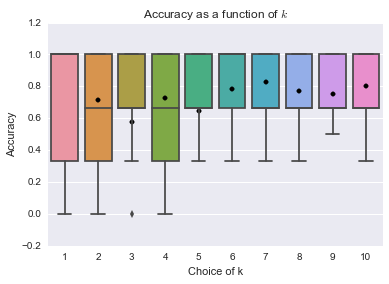

In [89]:
def plot_knn_cv_scores(clf):
    a = clf.grid_scores_
    scores = [b.cv_validation_scores for b in a]
    score_means = np.mean(scores, axis=1)
    
    sns.boxplot(x=k, y=scores)
    plt.scatter(k, score_means, c='k', zorder=2)
    plt.title('Accuracy as a function of $k$')
    plt.ylabel('Accuracy')
    plt.xlabel('Choice of k')
plot_knn_cv_scores(clf)
plt.show()

In [103]:
print clf.best_params_
clf.best_estimator_.predict(X_test)

{'n_neighbors': 6}


array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [128]:
def computeTestScores(test_x, test_y, clf, cv=5):
    from sklearn import metrics
    kFolds = cross_validation.KFold(test_x.shape[0], cv)
    scores = []
    for _, test_index in kFolds:
        test_data = test_x.ix[test_index]
        test_labels = test_y.ix[test_index]
        scores.append(metrics.accuracy_score(test_labels,
                clf.predict(test_data)))
    return scores

In [131]:
scores = computeTestScores(X_test, Y_test, clf.best_estimator_)
print 'mean accuracy: %.3f'%np.mean(scores)
print 'std deviation: %.3f'%np.std(scores)

mean accuracy: 0.640
std deviation: 0.271


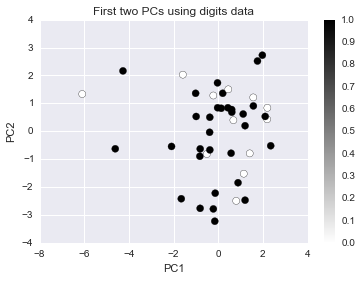

 explained variance: [ 3.03399762  2.31407235]
explained variance ratio: [ 0.18962485  0.14462952]


In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svd = Pipeline([('norm', StandardScaler()),
                ('svd', TruncatedSVD(n_components=2))])
                
X_2d = svd.fit_transform(X_train)

plt.scatter(X_2d[:,0], X_2d[:,1], c=Y_train, s = 50, cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two PCs using digits data')
plt.show()

res = svd.steps[1][1]
print 'explained variance:', res.explained_variance_
print 'explained variance ratio:', res.explained_variance_ratio_

There's some separation, but not as much as you would want or think.